In [1]:
import matplotlib.pyplot as plt
from qutip import basis, Bloch, Qobj, tensor, expect, ket2dm, qeye, fidelity, sigmaz, Options, destroy
from chalmers_qubit.sarimner.processor import SarimnerProcessor
from qutip_qip.circuit import QubitCircuit, Gate
from qutip_qip.compiler import Scheduler, Instruction
from qutip_qip.device import SCQubits
import numpy as np


%load_ext autoreload
%autoreload 2

## Longitudinal relaxation

In [5]:
num_qubits = 1

myprocessor = SarimnerProcessor(num_qubits) 

In [6]:
# master equation simulation
vac = basis(3,0)
a = destroy(3)
rho = a.dag() * vac

e_ops = [a.dag()*a]
t_total = 200

circuit = QubitCircuit(1)
circuit.add_gate("RX", targets=0, arg_value=0.5)

tlist = np.linspace(0,t_total, 30)
myprocessor.load_circuit(circuit)

<built-in method keys of dict object at 0x1304b7b80>


({'sx0': array([0.00000000e+00, 1.00020004e-02, 2.00040008e-02, ...,
         4.99799960e+01, 4.99899980e+01, 5.00000000e+01]),
  'sy0': array([0.00000000e+00, 1.00020004e-02, 2.00040008e-02, ...,
         4.99799960e+01, 4.99899980e+01, 5.00000000e+01])},
 {'sx0': array([ 0.        ,  0.99911778,  0.99647266, ..., -0.84150974,
         -0.86345537, -0.88387747]),
  'sy0': array([ 0.,  0.,  0., ..., -0., -0., -0.])})

In [7]:
result = myprocessor.run_state(rho, tlist=tlist, e_ops=e_ops)

NameError: name 't1' is not defined

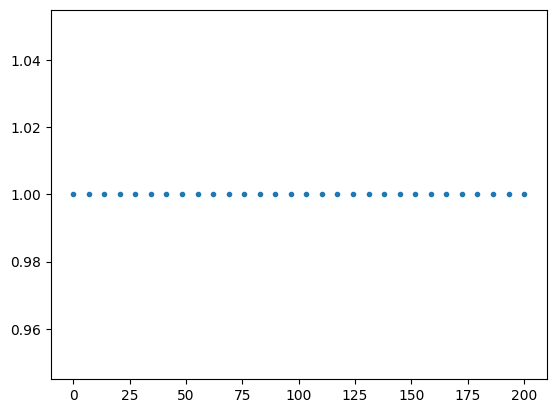

In [8]:
t = result.times
plt.figure(1)
plt.plot(t, result.expect[0], '.', linewidth=.5, label= r'simulation')
plt.plot(t, np.exp(-t/t1), '--', linewidth=1, label=r'theory, $\exp(-t/T1)$')
plt.yticks([0,1],[r'$|0\rangle$',r'$|1\rangle$'])
plt.xlabel(r'Time (ns)')
plt.ylabel(r'population')
plt.legend();

## Transversal relaxation

In [19]:
detuning = [2*np.pi*5.1] # detune the qubit slightly from its resonance freq
myprocessor = SarimnerProcessor(num_qubits, t1=t1, t2=t2, rotating_freq=detuning) 

In [20]:
# Prepare qubit in plus state
rho = (basis(3,1) + basis(3,0)).unit()
Hadamard = 1/np.sqrt(2)*Qobj([[1,1,0],[1,-1,0],[0,0,0]])
e_ops = [Hadamard*a.dag()*a*Hadamard]
# Transmon Hamiltonian with a slight detuning
t_total = 120 # in (ns)
tlist = np.linspace(0, t_total, 500)
# master equation simulation
result = myprocessor.run_state(rho, tlist=tlist, e_ops=e_ops)

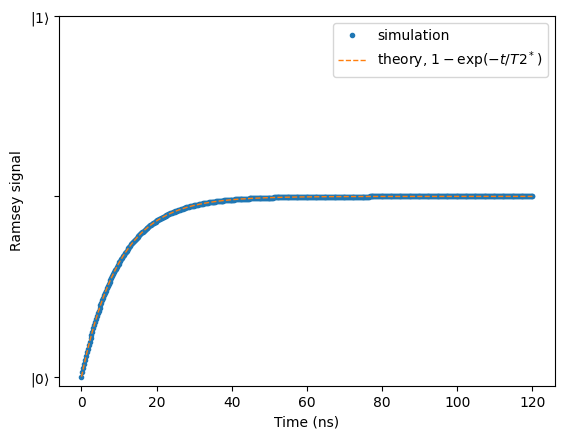

In [25]:
fig, ax = plt.subplots()
# detail about lenght of tlist needs to be fixed
ax.plot(tlist, result.expect[0], '.', linewidth = .5, label="simulation")
ax.plot(tlist, 1 -(np.exp(-tlist/(t2))+1)/2, '--', linewidth = 1, label=r"theory, $1 - \exp(-t/T2^*)$")
plt.yticks([0,.5,1], [r'$|0\rangle$','',r'$|1\rangle$'])
plt.xlabel(r"Time (ns)")
plt.ylabel(r"Ramsey signal")
plt.legend()